In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-13-06-29_BanditKomiyama_/BanditKomiyama.csv")

In [3]:
sorted(masterdata.bandit.unique())

['CUCB', 'Exp3.M', 'IMP-TS', 'MP-KLUCB', 'MP-OTS', 'MP-TS', 'OS']

In [4]:
masterdata.shape

(1400000, 6)

In [5]:
masterdata.groupby(["bandit", "dataset"])[['gain', 'banditk']].mean()

gain  banditk
bandit   dataset                     
CUCB     scenario1  1.297123        2
         scenario2  0.337891        3
Exp3.M   scenario1  1.283984        2
         scenario2  0.267108        3
IMP-TS   scenario1  1.299231        2
         scenario2  0.366852        3
MP-KLUCB scenario1  1.298865        2
         scenario2  0.364859        3
MP-OTS   scenario1  1.299214        2
         scenario2  0.366923        3
MP-TS    scenario1  1.299206        2
         scenario2  0.366819        3
OS       scenario1  1.299810        2
         scenario2  0.369630        3

In [6]:
masterdata = masterdata.groupby(["bandit", "dataset", "banditk", "iteration"]).mean()

In [7]:
masterdata = masterdata.reset_index()

In [8]:
sorted(masterdata['banditk'].unique())

[2, 3]

In [9]:
masterdata['dataset'].unique()

array(['scenario1', 'scenario2'], dtype=object)

In [10]:
masterdata["bandit"].unique()

array(['CUCB', 'Exp3.M', 'IMP-TS', 'MP-KLUCB', 'MP-OTS', 'MP-TS', 'OS'], dtype=object)

In [11]:
husl6 = sns.color_palette("husl", 6)

In [12]:
styledictionary = {
    'IMP-TS': {'marker': '^', 'color': husl6[1]},
    'MP-OTS': {'marker': '^', 'color': husl6[2]},
    'MP-TS': {'marker': '^', 'color': husl6[4]},
    
    'CUCB': {'marker': 's', 'color': husl6[1]},
    'MP-KLUCB': {'marker': 's', 'color': husl6[3]},
    'Exp3.M': {'marker': 'o', 'color': husl6[0]},
}

# Scenario 1

In [13]:
dataset  = "scenario1"
data = masterdata.loc[masterdata["dataset"] == dataset]

<IPython.core.display.Javascript object>


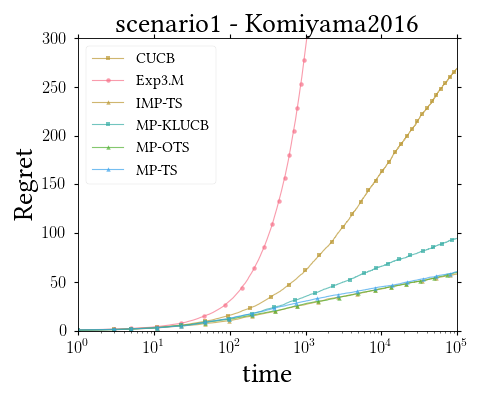

CUCB : 268.730000001
Exp3.M : 1582.63
IMP-TS : 57.9499999998
MP-KLUCB : 94.5299999998
MP-OTS : 59.6099999997
MP-TS : 60.46
OS : 0.0


In [15]:
%matplotlib notebook

plt.figure(figsize=(6,5))

ref = data[(data['bandit'] == "OS")].gain.cumsum()
ref = ref.reset_index()

data_grouped = data.groupby("bandit")

for i,df in data_grouped:
    cumsum = df.gain.cumsum()
    cumsum = cumsum.reset_index()
    cumsum = ref.gain - cumsum.gain
    name = df.iloc[0,0]
    if("OS" in name):
        pass # do not plot it 
    else:
        lw = 1
        cumsum.plot(label=name, linewidth=lw, #linestyle="--",
                            markevery=0.05, alpha=0.7, markersize=4, logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel("Regret")
plt.xlabel("time")
plt.title(r'%s - Komiyama2016'%dataset)
plt.ylim((0,300))
plt.legend(fontsize = 14, ncol=1)

plt.tight_layout()
plt.savefig("regret_%s_komiyama2016.pdf"%(dataset))

# Scenario 2

In [19]:
dataset  = "scenario2"
data = masterdata.loc[masterdata["dataset"] == dataset]

<IPython.core.display.Javascript object>


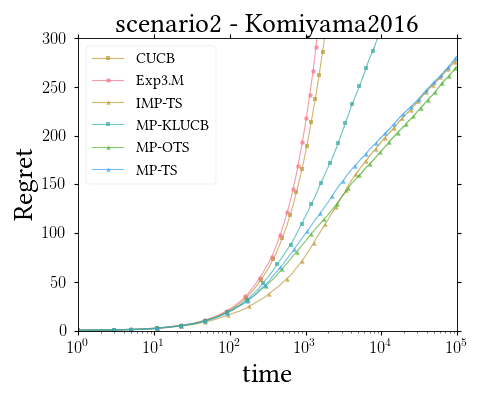

CUCB : 3173.86
Exp3.M : 10252.13
IMP-TS : 277.76
MP-KLUCB : 477.12
MP-OTS : 270.68
MP-TS : 281.09
OS : 0.0


In [20]:
%matplotlib notebook


plt.figure(figsize=(6,5))

ref = data[(data['bandit'] == "OS")].gain.cumsum()
ref = ref.reset_index()

data_grouped = data.groupby("bandit")

for i,df in data_grouped:
    cumsum = df.gain.cumsum()
    cumsum = cumsum.reset_index()
    cumsum = ref.gain - cumsum.gain
    name = df.iloc[0,0]
    if("OS" in name):
        pass # do not plot it 
    else:
        lw = 1
        cumsum.plot(label=name, linewidth=lw, #linestyle="--",
                            markevery=0.05, alpha=0.7, markersize=4, logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel("Regret")
plt.xlabel("time")
plt.title(r'%s - Komiyama2016'%dataset)
plt.ylim((0,300))
plt.legend(fontsize = 14, ncol=1)

plt.tight_layout()
plt.savefig("regret_%s_komiyama2016.pdf"%(dataset))